In [1]:
import numpy as np
import scipy.linalg as la

In [2]:
N=10000
A = np.random.normal(10,2,N)
ndx = np.random.normal(-2.5,0.2,N)
x = np.arange(1,50)
data = A[:,None]*(x[None,:]/10)**ndx[:,None]


In [3]:
cov = np.cov(data,rowvar=False)
eva,eve = la.eig(cov)
lcov = np.cov(np.log(data),rowvar=False)
leva,leve = la.eig(lcov)

/opt/conda/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[]

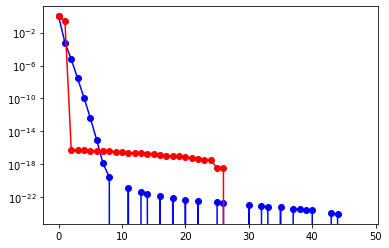

In [4]:
plt.plot(eva/eva[0],'bo-')
plt.plot(sorted(leva,reverse=True)/leva.max(),'ro-')
plt.semilogy()

In [5]:
np.argsort(leva)

array([ 3,  4,  7, 10,  9, 18, 14, 13, 20, 19, 25, 29, 28, 30, 32, 31, 34,
       36, 35, 41, 40,  0, 43, 42, 48, 47, 46, 45, 44, 39, 38, 37, 33, 27,
       26, 24, 23, 22, 21, 17, 16, 15, 12, 11,  8,  6,  5,  1,  2])

In [6]:
fleve = np.real(leve[:,1:3]).T
feve = np.real(eve[:,0:5]).T

In [7]:
def project_out(data, vecs):
    odata = np.copy(data)
    for v in vecs:
        coef = np.sum(odata*v[None,:],axis=1)/np.dot(v,v)
        odata -= coef[:,None]*v[None,:]
    return odata

def project_out_log(data, vecs):
    ldata= np.log(data)
    topr = np.zeros_like(data)
    for v in vecs:
        coef = np.sum(ldata*v[None,:],axis=1)/np.dot(v,v)
        topr +=  coef[:,None]*v[None,:]
    return data-np.exp(topr)

In [8]:
linp_data = project_out(data,feve)
logp_data = project_out_log(data,fleve)

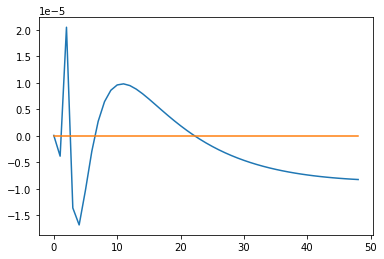

In [9]:
plt.plot(linp_data.mean(axis=0))
plt.plot(logp_data.mean(axis=0))
